# PAYGO LOAN DEFAULT

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Aseta\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('Train.csv')
train.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0


In [3]:
metadata = pd.read_csv('metadata.csv')
metadata.head()

C:\Users\Aseta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_K00S4N4,10/12/2015 00:00,2000,NaN,0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740,08/12/2016 00:00,10/12/2015 09:52,23/10/2016 04:52
1,ID_6L67PAA,09/12/2015 00:00,2000,NaN,0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740,07/12/2016 00:00,09/12/2015 13:14,24/05/2020 15:32
2,ID_102CV85,18/12/2015 00:00,2000,29/03/2018 10:14,35,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480,13/01/2017 00:00,18/12/2015 06:22,01/02/2017 15:23
3,ID_HXBJFHB,25/11/2015 00:00,2000,NaN,0,FINANCED,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740,23/11/2016 00:00,25/11/2015 13:25,22/05/2017 16:46
4,ID_3K9VZ5J,02/12/2015 00:00,2000,NaN,0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740,30/11/2016 00:00,05/12/2015 10:34,12/05/2017 16:50


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28007 entries, 0 to 28006
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                28007 non-null  object 
 1   TransactionDates  28007 non-null  object 
 2   PaymentsHistory   28007 non-null  object 
 3   m1                28007 non-null  float64
 4   m2                28007 non-null  float64
 5   m3                28007 non-null  float64
 6   m4                28007 non-null  float64
 7   m5                28007 non-null  float64
 8   m6                28007 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.9+ MB


In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37343 entries, 0 to 37342
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37343 non-null  object 
 1   RegistrationDate     37343 non-null  object 
 2   Deposit              37343 non-null  int64  
 3   UpsellDate           973 non-null    object 
 4   AccessoryRate        37343 non-null  int64  
 5   PaymentMethod        37343 non-null  object 
 6   rateTypeEntity       37343 non-null  object 
 7   RatePerUnit          37343 non-null  int64  
 8   DaysOnDeposit        37343 non-null  int64  
 9   MainApplicantGender  37343 non-null  object 
 10  Age                  30404 non-null  float64
 11  Region               35409 non-null  object 
 12  Town                 37343 non-null  object 
 13  Occupation           37343 non-null  object 
 14  SupplierName         37343 non-null  object 
 15  Term                 37343 non-null 

In [6]:
# Check the unique values per column
metadata.nunique()

ID                     37343
RegistrationDate       33980
Deposit                   11
UpsellDate               188
AccessoryRate             18
PaymentMethod              1
rateTypeEntity             3
RatePerUnit               11
DaysOnDeposit              6
MainApplicantGender        2
Age                       83
Region                     7
Town                      48
Occupation                 7
SupplierName               1
Term                      48
TotalContractValue        33
ExpectedTermDate       33744
FirstPaymentDate       34043
LastPaymentDate        31758
dtype: int64

In [7]:
# For metadata DF
# Drop : 
# PaymentMethod, SupplierName - only one category
# upsellDate(many mising values) , AccessoryRate (is tied to upsell and has many zeros i.e it has many zero values)
# Town(we will use region for location)
# All dates
# Days to deadline = ExpectedTermDate - LastPaymentDate
# Days paid so far = LastPaymentDate - RegistrationDate

# for train DF
# ratio of monthly average payment to the total expected payment
# get the average payment per month so far

In [8]:
metadata[['RegistrationDate','ExpectedTermDate','FirstPaymentDate','LastPaymentDate']] = metadata[['RegistrationDate','ExpectedTermDate','FirstPaymentDate','LastPaymentDate']].apply(
    lambda x:pd.to_datetime(x, format='%d/%m/%Y %H:%M') )
metadata['days_to/past_deadline'] = (metadata['ExpectedTermDate'] - metadata['LastPaymentDate']).apply(lambda x:x.days) 
metadata['days_from_start'] = (metadata['LastPaymentDate'] - metadata['RegistrationDate']).apply(lambda x:x.days)
metadata_col_drop =['PaymentMethod','SupplierName','UpsellDate','AccessoryRate','Town',
               'RegistrationDate','ExpectedTermDate','FirstPaymentDate','LastPaymentDate']
metadata = metadata.drop(metadata_col_drop,axis=1)

In [9]:
#metadata.head(10)

In [10]:
train['mean_payment'] = train['PaymentsHistory'].apply(lambda x:np.mean(list(map(float, x.strip('[]').split(','))) ))
train = train.drop(['PaymentsHistory','TransactionDates'],axis=1)
train_data  = pd.merge(metadata,train , on='ID')
train_data['Region'] = train_data['Region'].fillna('Not Given')

def age_grouper(x):
    if x<30:
        return '<31'
    elif x<50:
        return '31-60'
    elif x>60:
        return '>60'
    else:
        return 'other' #not given or missing

train_data['Age'] = train_data['Age'].apply(age_grouper)

# EDA

In [11]:
train_data.head()

,ID,Deposit,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Occupation,Term,TotalContractValue,days_to/past_deadline,days_from_start,m1,m2,m3,m4,m5,m6,mean_payment
0,ID_K00S4N4,2000,DAILY,35,7,Male,31-60,Mount Kenya Region,Other,364,14740,45,318,1225.0,1050.0,1190.0,525.0,1750.0,1890.0,1422.000000
1,ID_102CV85,2000,DAILY,35,7,Female,31-60,Nairobi Region,Business,392,29480,-20,411,980.0,980.0,1225.0,980.0,935.0,355.0,1281.111111
2,ID_HXBJFHB,2000,DAILY,35,7,Female,31-60,Not Given,Teacher,364,14740,-181,544,250.0,1000.0,250.0,500.0,560.0,1150.0,1006.363636
3,ID_3K9VZ5J,2000,DAILY,35,7,Female,other,Mount Kenya Region,Other,364,14740,-164,527,630.0,805.0,700.0,855.0,245.0,775.0,894.166667
4,ID_6YU5YRB,2000,DAILY,35,7,Male,other,Mount Kenya Region,Other,364,14740,-4,367,1050.0,985.0,1085.0,980.0,1770.0,90.0,1254.285714


In [12]:
columns_to_compare = ['rateTypeEntity','Age','Region','Occupation','MainApplicantGender']

### Mean Deposit by different categories

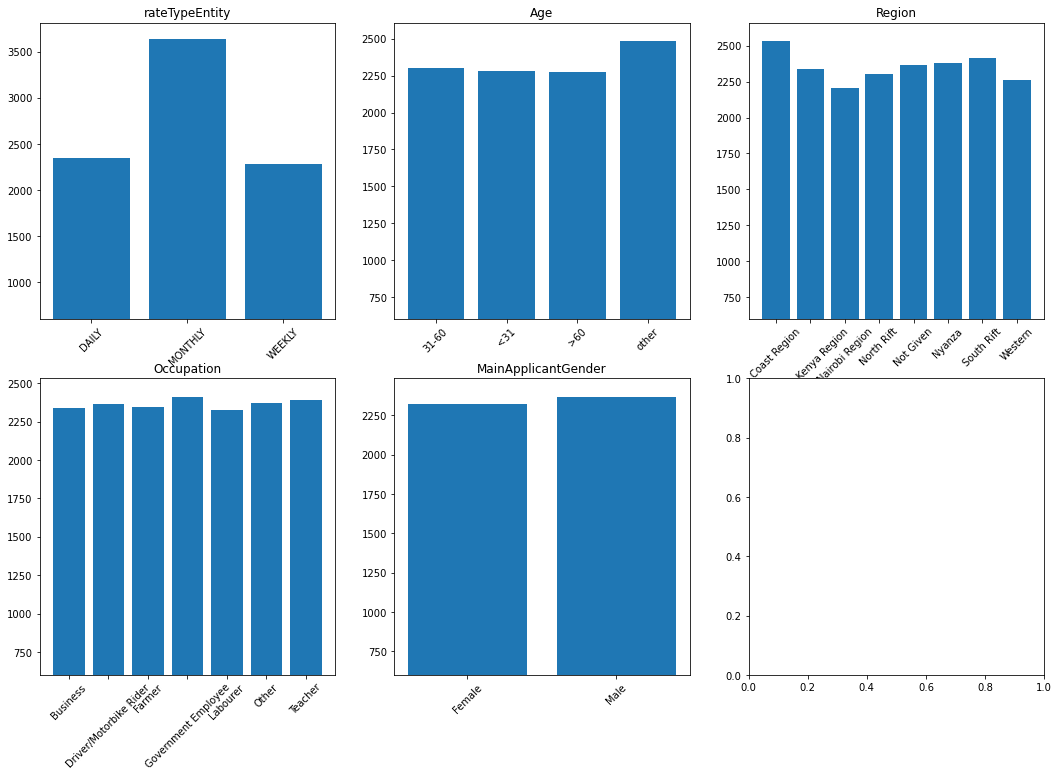

In [13]:
plt.rcParams['figure.figsize'] = (18,12)
fig ,ax  = plt.subplots(2,3)

for i,j in enumerate(columns_to_compare):
    df = train_data.pivot_table(values='Deposit',columns=j, aggfunc='mean')
    ax[i//3 ,i%3].bar(df.columns.values, df.values[0])
    ax[i//3 ,i%3].set_ylim(600,)
    ax[i//3 ,i%3].set_xticklabels(df.columns.values, rotation=45)
    ax[i//3 ,i%3].set_title(j)

### Mean Payment by different categories

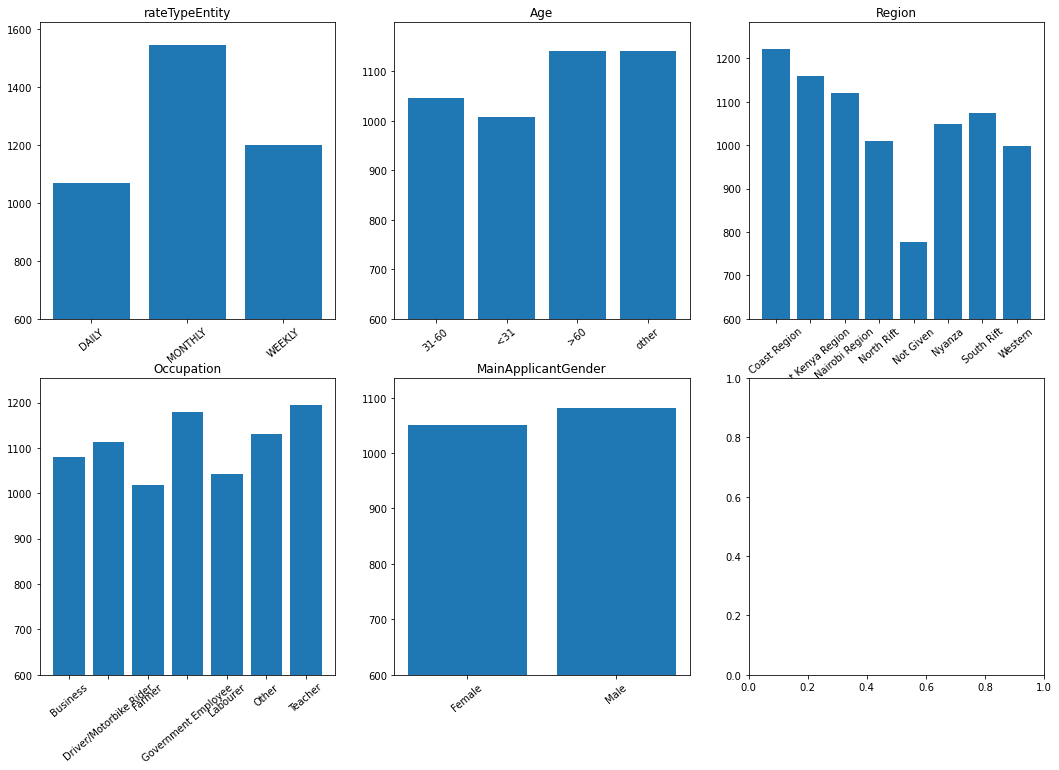

In [14]:
fig ,ax  = plt.subplots(2,3)

for i,j in enumerate(columns_to_compare):
    df = train_data.pivot_table(values='mean_payment',columns=j, aggfunc='mean')
    ax[i//3 ,i%3].bar(df.columns.values, df.values[0])
    ax[i//3 ,i%3].set_ylim(600,)
    ax[i//3 ,i%3].set_xticklabels(df.columns.values, rotation=40)
    ax[i//3 ,i%3].set_title(j)

### Mean Contract Value by different Categories

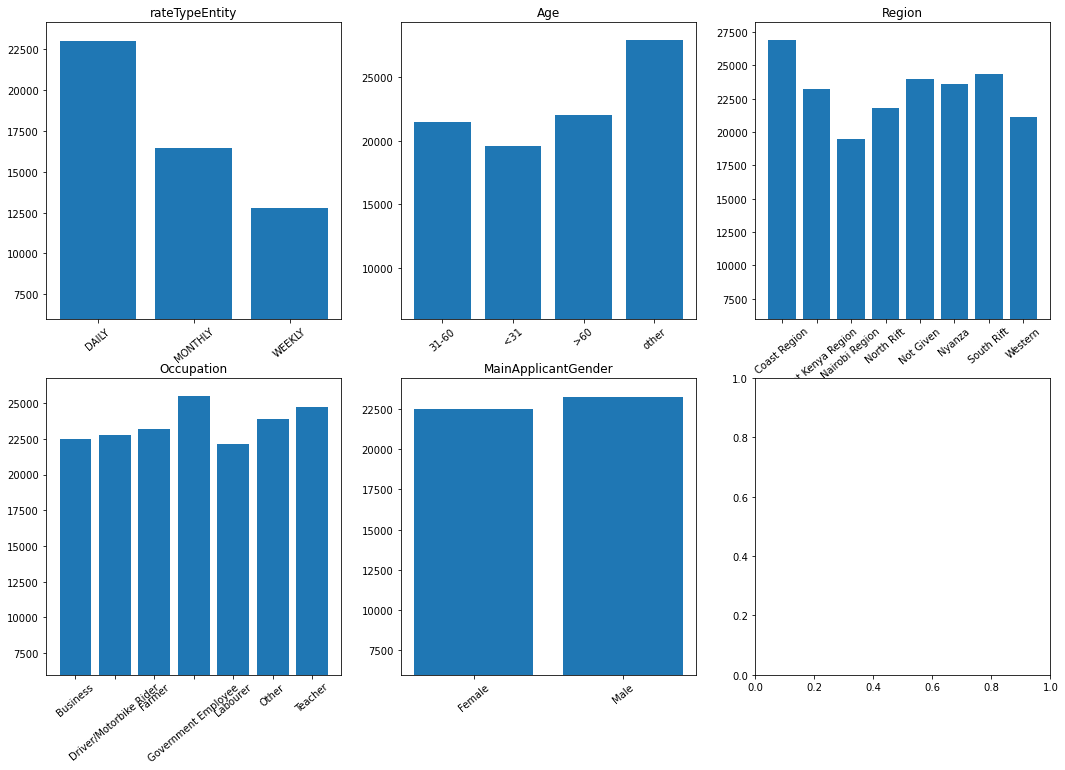

In [15]:
fig ,ax  = plt.subplots(2,3)

for i,j in enumerate(columns_to_compare):
    df = train_data.pivot_table(values='TotalContractValue',columns=j, aggfunc='mean')
    ax[i//3 ,i%3].bar(df.columns.values, df.values[0])
    ax[i//3 ,i%3].set_ylim(6000,)
    ax[i//3 ,i%3].set_xticklabels(df.columns.values, rotation=40)
    ax[i//3 ,i%3].set_title(j)

### See which category has the largest disparity

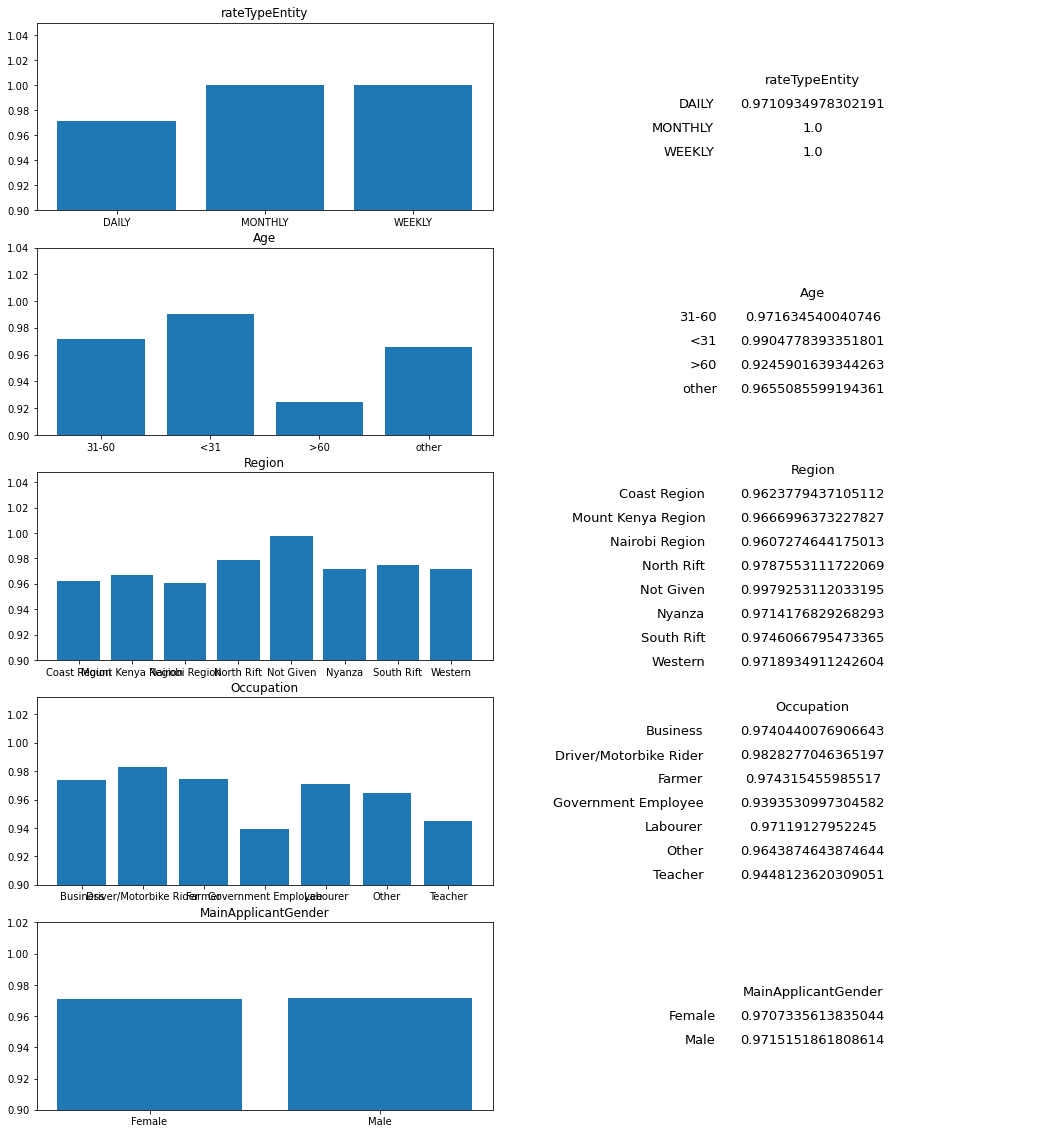

In [16]:
train_data_copy = train_data.copy()
train_data_copy['days_to/past_deadline'] = train_data_copy['days_to/past_deadline'].apply(lambda x: 'Defaulted' if x<0  else 'Not defaulted')
plt.rcParams['figure.figsize']=(18,20)
fig, ax =  plt.subplots(len(columns_to_compare),2)

for j,i in enumerate(columns_to_compare):
    df = train_data_copy[[i,'days_to/past_deadline']].pivot_table(index=i,columns='days_to/past_deadline' ,
                                                         aggfunc={'days_to/past_deadline':'count'}).droplevel(0, axis=1)
    df=df.fillna(0)
    df_res = pd.DataFrame(df['Defaulted']/(df['Defaulted']+df['Not defaulted']))
    col_labels =[df_res.index.name]
    
    ax[j,0].bar(df_res.index.values,df_res.values.ravel())
    ax[j,0].set_ylim(0.90,)
    ax[j,0].set_title(i)
    df_table_plot = ax[j,1].table(cellText=df_res.values, colWidths = [0.4]*len(df_res.columns), rowLabels=df_res.index, colLabels=col_labels,
                  cellLoc = 'center', rowLoc = 'top',loc='center',edges='open')
    df_table_plot.scale(1,2)
    df_table_plot.set_fontsize(34)
    ax[j,1].axis('off')
    
# We see that no particular category gives a value that is "off" to show that there is a big difference, apart from 
# maybe the >60 year olds and government employees with default rates of less than 94

In [17]:
# Get dictionaries for labels
for i in train_data.columns:
    if train_data[i].dtype == 'object' and i!= 'ID' :
        new_dict = dict()
        for j,unique_value in enumerate(train_data[i].unique()):
            new_dict[unique_value] = j
        name_ = 'dict_'+str(i) 
        globals()[name_]=new_dict

dict_Occupation

{'Other': 0,
 'Business': 1,
 'Teacher': 2,
 'Farmer': 3,
 'Driver/Motorbike Rider': 4,
 'Government Employee': 5,
 'Labourer': 6}

In [18]:
for i in train_data.columns:
    if train_data[i].dtype == 'object' and i!= 'ID' :
        train_data[i] = train_data[i].astype("category")
        train_data[i] = train_data[i].apply(lambda x:globals()['dict_'+str(i)][x])
    
train_data = train_data.set_index('ID')
train_data['Mean pay/Total pay'] = train_data['mean_payment']/train_data['TotalContractValue']

In [23]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error as mse

### Base Model

MSE :  446620.6803434519 
RMSE :  613.9825746984792


<BarContainer object of 14 artists>

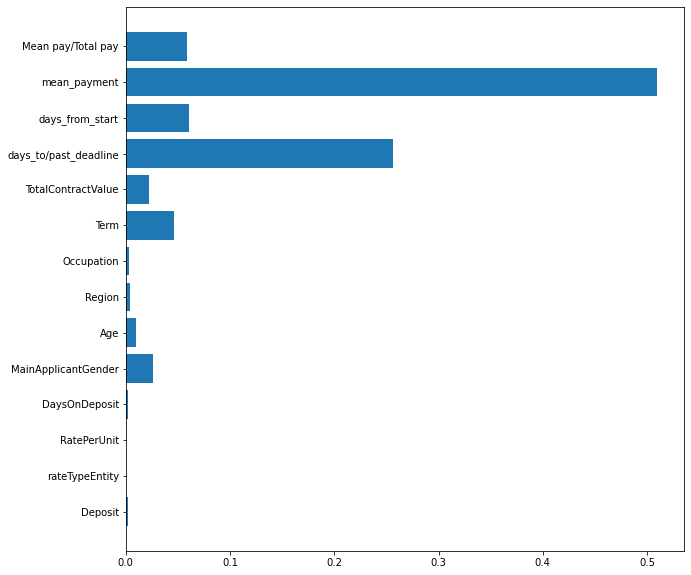

In [20]:
x = train_data[[i for i in train_data.columns if i not in ['m1','m2','m3','m4','m5','m6']]]
y = train_data[['m1','m2','m3','m4','m5','m6']]
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size= 0.2, random_state=12)

model = RFR(n_estimators = 500, max_depth=4)
model.fit(train_x,train_y)
model_result = model.predict(test_x)
print('MSE : ',mse(model_result,test_y),'\nRMSE : ',mse(model_result,test_y,squared=False))
plt.figure(figsize=(10,10))
plt.barh(train_x.columns,model.feature_importances_ )

### MODEL

In [21]:
train_data_reduced = train_data.drop(['rateTypeEntity','RatePerUnit','DaysOnDeposit'], axis=1)
x = train_data_reduced[[i for i in train_data_reduced.columns if i not in ['m1','m2','m3','m4','m5','m6']]]
y = train_data_reduced[['m1','m2','m3','m4','m5','m6']]
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size= 0.2, random_state=12)


In [24]:
model = RFR()
param_dict = {
    'n_estimators' : np.arange(300,800,100),
    'max_depth' : np.arange(7,13) 
}
gcv_search = GridSearchCV(model, param_grid=param_dict, n_jobs=-1, cv=10)
search = gcv_search.fit(train_x,train_y)
search.best_params_

{'max_depth': 10, 'n_estimators': 500}

MSE :  426237.256240111 
RMSE :  587.4984394968037


<BarContainer object of 11 artists>

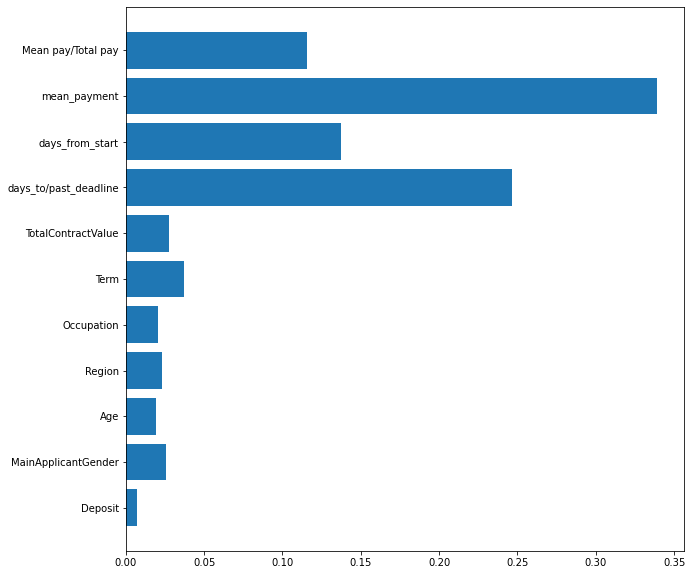

In [25]:
model = RFR(n_estimators= 500, max_depth=10)
model.fit(train_x,train_y)
model_result = model.predict(test_x)
print('MSE : ',mse(model_result,test_y),'\nRMSE : ',mse(model_result,test_y,squared=False))
plt.figure(figsize=(10,10))
plt.barh(train_x.columns,model.feature_importances_ )

In [ ]:
test = pd.read_csv("Test.csv")

test['mean_payment'] = test['PaymentsHistory'].apply(lambda x:np.mean(list(map(float, x.strip('[]').split(','))) ))
test = test.drop(['PaymentsHistory','TransactionDates'],axis=1)
test_data  = pd.merge(metadata,test , on='ID')
test_data['Region'] = test_data['Region'].fillna('Not Given')

def age_grouper(x):
    if x<30:
        return '<31'
    elif x<50:
        return '31-60'
    elif x>60:
        return '>60'
    else:
        return 'other' #not given or missing

test_data['Age'] = test_data['Age'].apply(age_grouper)
for i in test_data.columns:
    if test_data[i].dtype == 'object' and i!= 'ID' :
        test_data[i] = test_data[i].astype("category")
        test_data[i] = test_data[i].apply(lambda x:globals()['dict_'+str(i)][x])
    
test_data = test_data.set_index('ID')
test_data['Mean pay/Total pay'] = test_data['mean_payment']/test_data['TotalContractValue']
test_data = test_data.drop(['rateTypeEntity','RatePerUnit','DaysOnDeposit'], axis=1)

model_result = model.predict(test_data)

model_result_df=pd.DataFrame(model_result,index=test_data.index, columns=['m1','m2','m3','m4','m5','m6'])
model_result_df = model_result_df.stack().reset_index()
model_result_df['ID']= model_result_df[['ID','level_1']].agg(' x '.join, axis=1)
model_result_df = model_result_df.drop('level_1',axis=1).rename(columns={0:'Target'}).set_index('ID')
model_result_df.to_csv("BaseSubmission.csv")
model_result_df.head()

In [ ]:
len(test_data)*6 ==  len(model_result_df)